In [20]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# import data
afglt = pd.read_csv(r'C:\Users\nadia\Desktop\report0\arxeia\afglt.dat', delimiter='\t', encoding='latin1',skiprows=2, header=None)
afglms = pd.read_csv(r'C:\Users\nadia\Desktop\report0\arxeia\afglms.dat', delimiter='\t', encoding='latin1',skiprows=2, header=None)
afglmw = pd.read_csv(r'C:\Users\nadia\Desktop\report0\arxeia\afglmw.dat', delimiter='\t', encoding='latin1',skiprows=2, header=None)
afglss = pd.read_csv(r'C:\Users\nadia\Desktop\report0\arxeia\afglss.dat', delimiter='\t', encoding='latin1',skiprows=2, header=None)
afglsw = pd.read_csv(r'C:\Users\nadia\Desktop\report0\arxeia\afglsw.dat', delimiter='\t', encoding='latin1',skiprows=2, header=None) 

afglt.head()

,0
0,120.000 0.00002 380.000 4.288552E+...
1,115.000 0.00004 299.700 8.700167E+...
2,110.000 0.00006 241.600 1.939631E+...
3,105.000 0.00013 212.000 4.441394E+...
4,100.000 0.00029 190.700 1.097638E+...


In [22]:
# function for splitting columns, not my best work but nothing else worked and a deadline is a deadline

def splitcols(file):
    file[0]=file[0].str.strip()
    file[['z(km)', 'rest']] = file[0].str.split(' ',n=1, expand=True)
    file['rest'] = file['rest'].str.strip()
    file[['p(mb)', 'rest1']] = file['rest'].str.split(' ',n=1, expand=True)
    file['rest1'] = file['rest1'].str.strip()
    file[['T(K)', 'rest2']] = file['rest1'].str.split(' ',n=1, expand=True)
    file['rest2'] = file['rest2'].str.strip()
    file[['air(cm-3)', 'rest3']] = file['rest2'].str.split(' ',n=1, expand=True)
    file['rest3'] = file['rest3'].str.strip()
    file[['o3(cm-3)', 'rest4']] = file['rest3'].str.split(' ',n=1, expand=True)
    file['rest4'] = file['rest4'].str.strip()
    file[['o2(cm-3)', 'rest5']] = file['rest4'].str.split(' ',n=1, expand=True)
    file['rest5'] = file['rest5'].str.strip()
    file[['h2o(cm-3)', 'rest6']] = file['rest5'].str.split(' ',n=1, expand=True)
    file['rest6'] = file['rest6'].str.strip()
    file[['co2(cm-3)', 'no2(cm-3)']] = file['rest6'].str.split(' ',n=1, expand=True)
    file['no2(cm-3)'] = file['no2(cm-3)'].str.strip()
    file.drop(['rest', 'rest1', 'rest2', 'rest3', 'rest4', 'rest5', 'rest6'], axis=1, inplace=True)
    file['z(km)'] = file['z(km)'].astype(float)
    file['p(mb)'] = file['p(mb)'].astype(float)
    file['T(K)'] = file['T(K)'].astype(float)
    file['air(cm-3)'] = file['air(cm-3)'].astype(float)
    file['o3(cm-3)'] = file['o3(cm-3)'].astype(float)
    file['o2(cm-3)'] = file['o2(cm-3)'].astype(float)
    file['h2o(cm-3)'] = file['h2o(cm-3)'].astype(float)
    file['co2(cm-3)'] = file['co2(cm-3)'].astype(float)
    file['no2(cm-3)'] = file['no2(cm-3)'].astype(float)
    
    return file

In [23]:
# functions for the graphs, yes i know i could just make one with more args but i prefer it this way

def pressure(file, title):
    plt.figure(figsize=(5,5))
    plt.plot(file['p(mb)'],file['z(km)'], markersize = 1)
    plt.xlabel("pressure (mb)")
    plt.ylabel("height (km)")
    plt.title(label=title)
    plt.grid()
    
def temp(file,title):
    plt.figure(figsize=(5,5))
    plt.plot(file['T(K)'],file['z(km)'], markersize = 1)
    plt.xlabel("temperature(K)")
    plt.ylabel("height (km)")
    plt.title(label=title)
    plt.grid()
    
def gases(file,filegas,xlabel,title):
    plt.figure(figsize=(5,5))
    plt.plot(filegas,file['z(km)'], markersize = 1)
    plt.xlabel(xlabel)
    plt.ylabel("height (km)")
    plt.title(label=title)
    plt.grid()
    
def distribution(file,fraction, xlabel,title):
    plt.figure(figsize=(5,5))
    plt.plot(fraction,file['z(km)'], markersize = 1)
    plt.xlabel(xlabel)
    plt.ylabel("height (km)")
    plt.title(label=title)
    plt.grid()

In [24]:
# clean data
trop = splitcols(afglt)
midsum = splitcols(afglms)
midwin = splitcols(afglmw)
subarcs = splitcols(afglss)
subarcw = splitcols(afglsw)

trop.head()

,0,z(km),p(mb),T(K),air(cm-3),o3(cm-3),o2(cm-3),h2o(cm-3),co2(cm-3),no2(cm-3)
0,120.000 0.00002 380.000 4.288552E+11 2...,120.0,0.00002,380.0,4.288552e+11,211.25,3.063125e+10,84500.01,1.478750e+07,63.7975
1,115.000 0.00004 299.700 8.700167E+11 4...,115.0,0.00004,299.7,8.700167e+11,4353.00,8.183640e+10,208944.00,3.482400e+07,134.9430
2,110.000 0.00006 241.600 1.939631E+12 9...,110.0,0.00006,241.6,1.939631e+12,97050.00,2.329200e+11,543480.00,1.164600e+08,308.6190
3,105.000 0.00013 212.000 4.441394E+12 8...,105.0,0.00013,212.0,4.441394e+12,889000.10,6.223000e+11,1511300.00,4.889500e+08,728.9800
4,100.000 0.00029 190.700 1.097638E+13 4...,100.0,0.00029,190.7,1.097638e+13,4392000.00,1.756800e+12,4392000.00,2.141100e+09,1866.6000


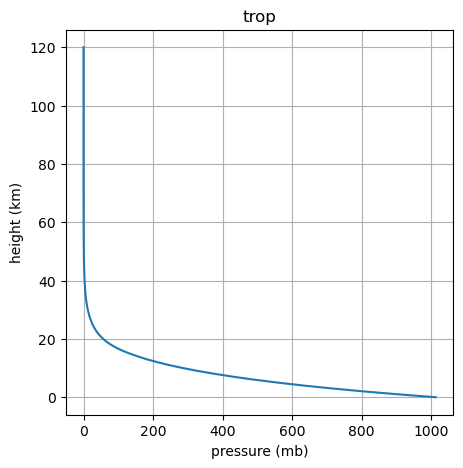

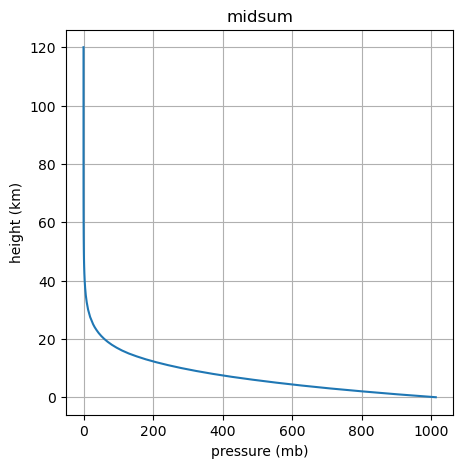

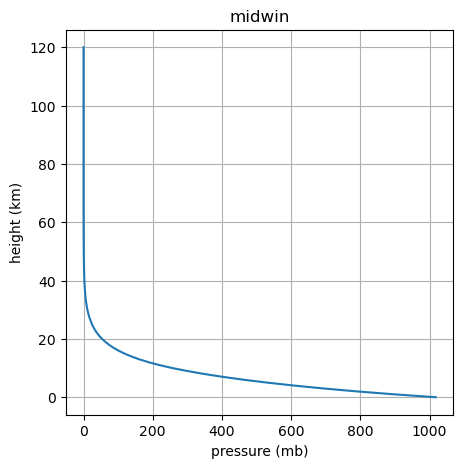

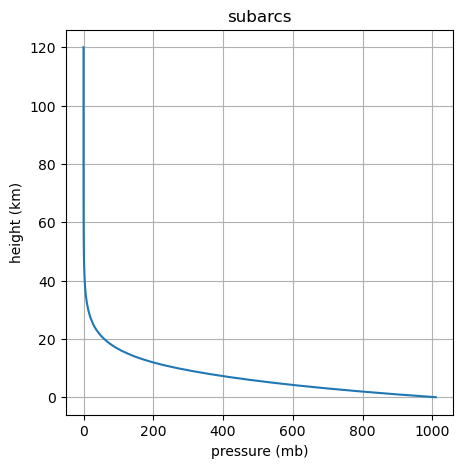

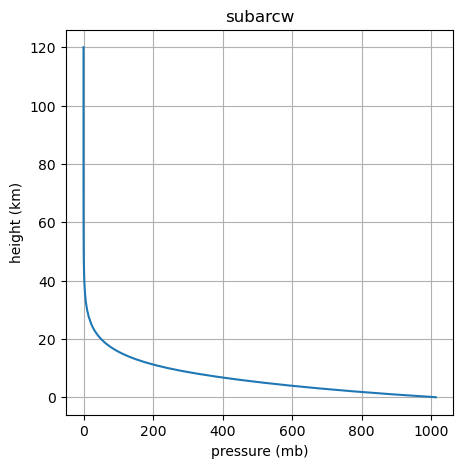

In [25]:
# pressure graphs -> 

pressure(trop,"trop")
pressure(midsum,'midsum')
pressure(midwin, 'midwin')
pressure(subarcs, 'subarcs')
pressure(subarcw, 'subarcw')

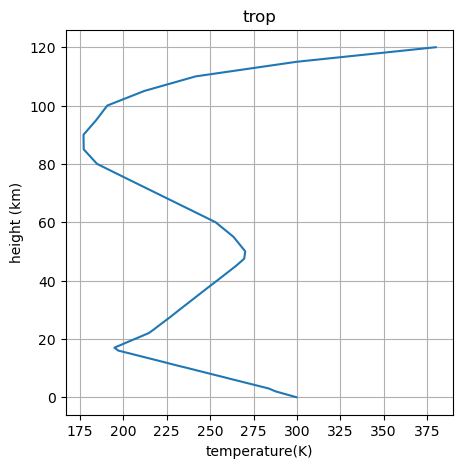

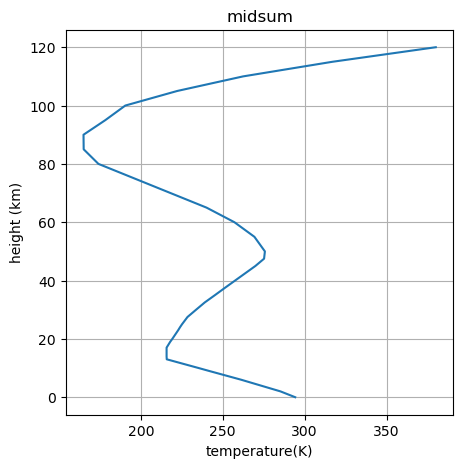

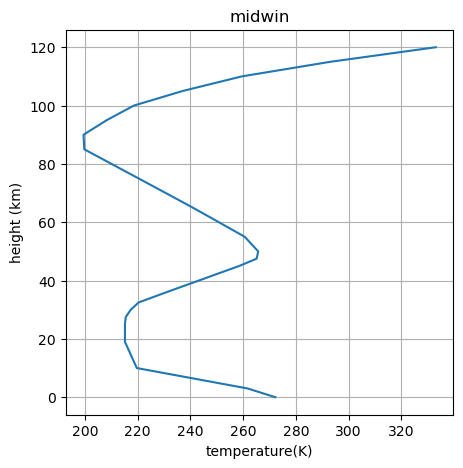

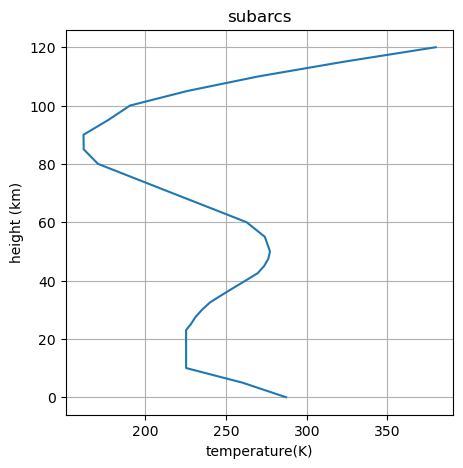

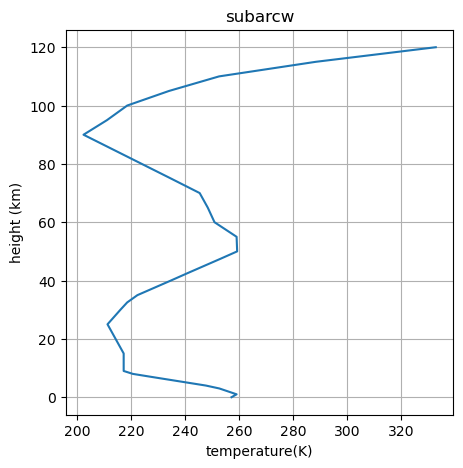

In [26]:
# temperature graphs -> they show where the tropopause is 

temp(trop,"trop")
temp(midsum,'midsum')
temp(midwin, 'midwin')
temp(subarcs, 'subarcs')
temp(subarcw, 'subarcw')

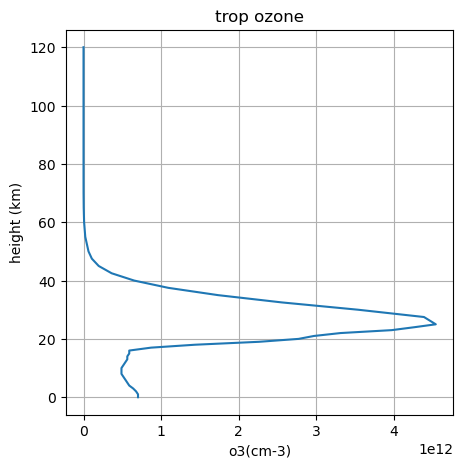

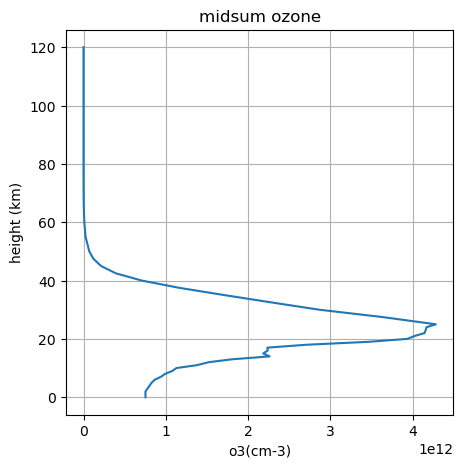

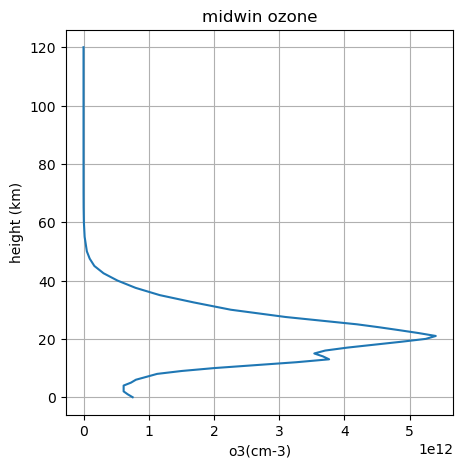

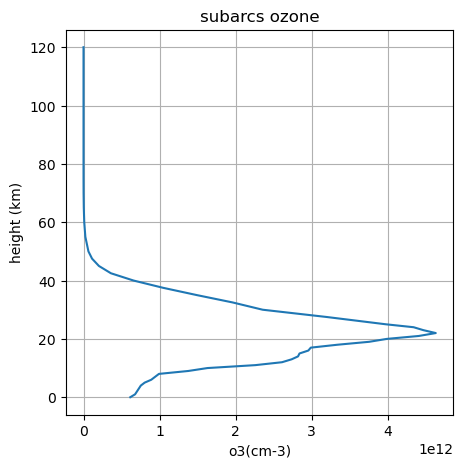

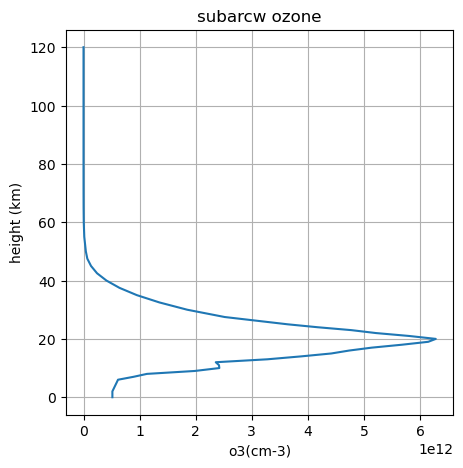

In [27]:
# ozone -> Total ozone is generally lowest at the equator and highest in polar regions.During spring, 
#total ozone exhibits maximums at latitudes poleward of about 45° N in the Northern Hemisphere
#and between 45° and 60° S in the Southern Hemisphere. These spring maximums are a result of increased transport 
#of ozone from its source region in the tropics toward high latitudes during late autumn and winter.

gases(trop, trop['o3(cm-3)'],'o3(cm-3)', "trop ozone")
gases(midsum, midsum['o3(cm-3)'], 'o3(cm-3)', 'midsum ozone')
gases(midwin, midwin['o3(cm-3)'], 'o3(cm-3)', 'midwin ozone')
gases(subarcs, subarcs['o3(cm-3)'], 'o3(cm-3)', 'subarcs ozone')
gases(subarcw, subarcw['o3(cm-3)'], 'o3(cm-3)', 'subarcw ozone')

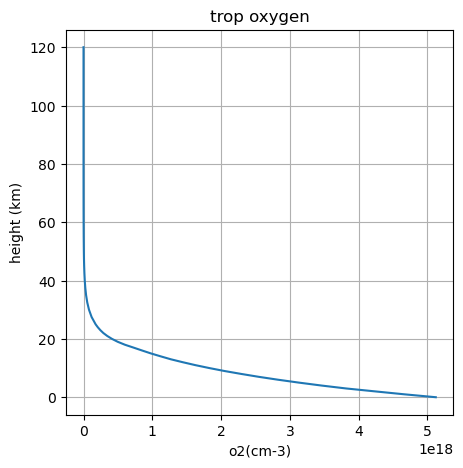

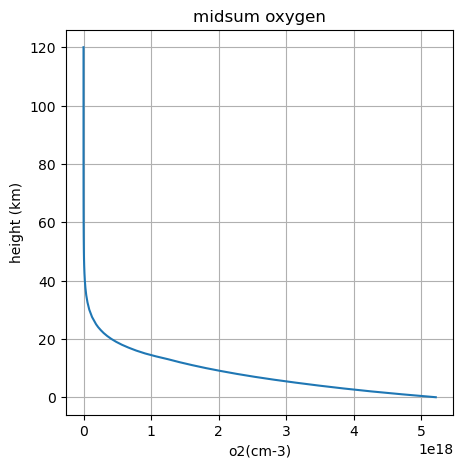

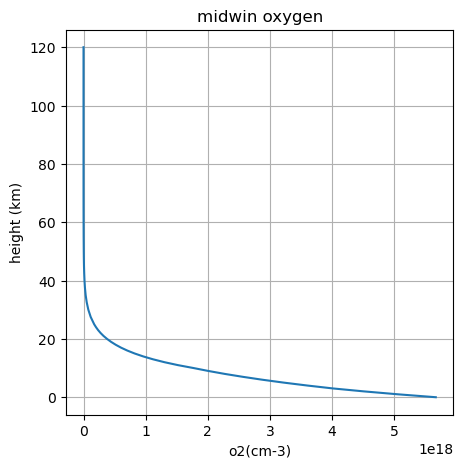

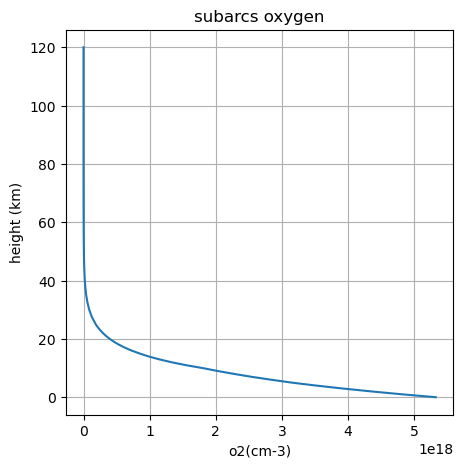

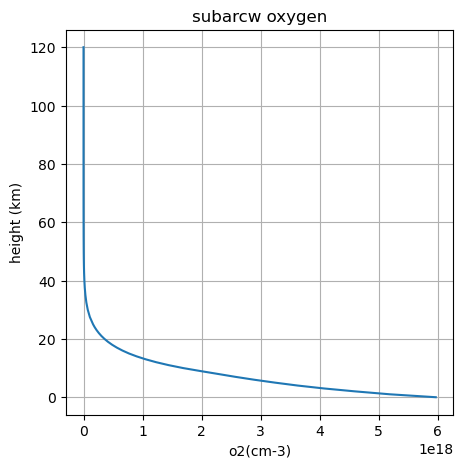

In [28]:
#oxygen -> water molecules with heavy 18-O isotopes in them condense more easily than normal water molecules, 
#air becomes progressively depleted in 18-O as it travels to high latitudes and becomes colder and drier.

gases(trop, trop['o2(cm-3)'],'o2(cm-3)', "trop oxygen")
gases(midsum, midsum['o2(cm-3)'], 'o2(cm-3)', 'midsum oxygen')
gases(midwin, midwin['o2(cm-3)'], 'o2(cm-3)', 'midwin oxygen')
gases(subarcs, subarcs['o2(cm-3)'], 'o2(cm-3)', 'subarcs oxygen')
gases(subarcw, subarcw['o2(cm-3)'], 'o2(cm-3)', 'subarcw oxygen')

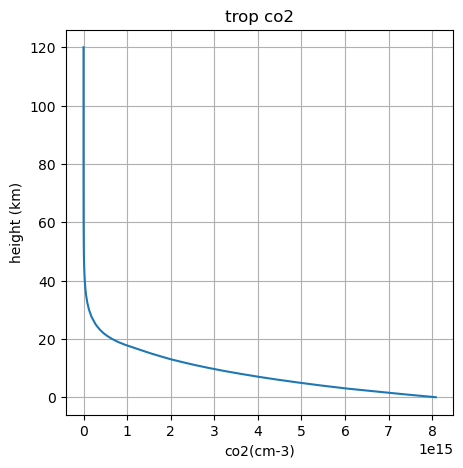

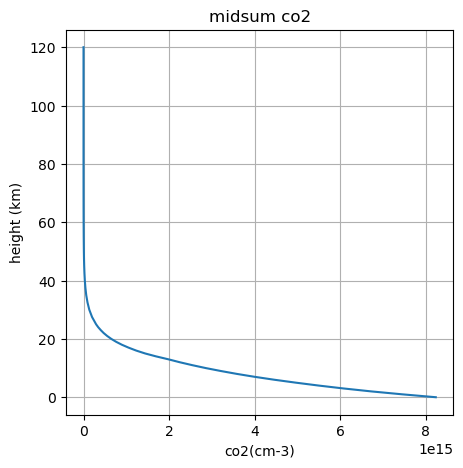

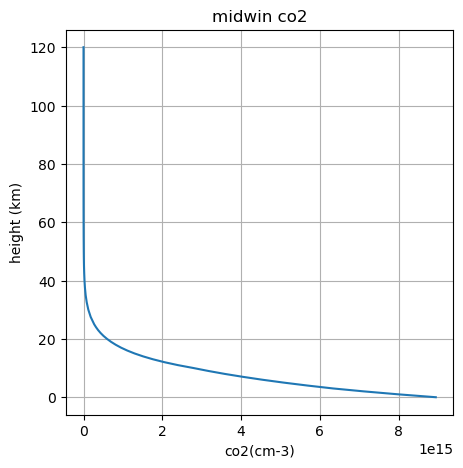

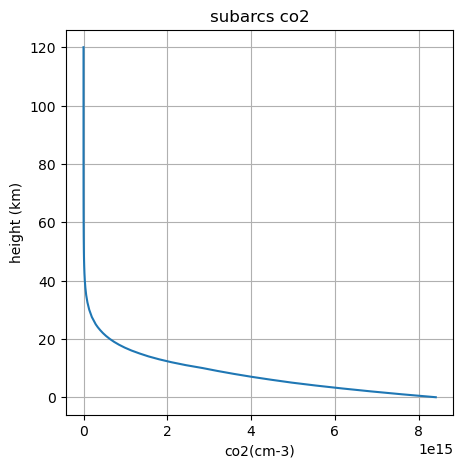

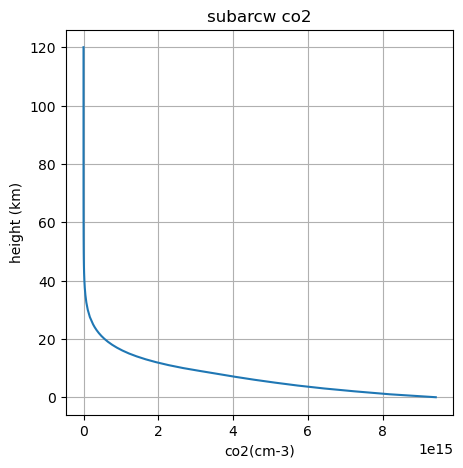

In [29]:
# co2 -> strong seasonal CO2 fluctuations throughout the Northern Hemisphere 
#and weaker fluctuations near the equator and in the Southern Hemisphere.

gases(trop, trop['co2(cm-3)'],'co2(cm-3)', "trop co2")
gases(midsum, midsum['co2(cm-3)'], 'co2(cm-3)', 'midsum co2')
gases(midwin, midwin['co2(cm-3)'], 'co2(cm-3)', 'midwin co2')
gases(subarcs, subarcs['co2(cm-3)'], 'co2(cm-3)', 'subarcs co2')
gases(subarcw, subarcw['co2(cm-3)'], 'co2(cm-3)', 'subarcw co2')

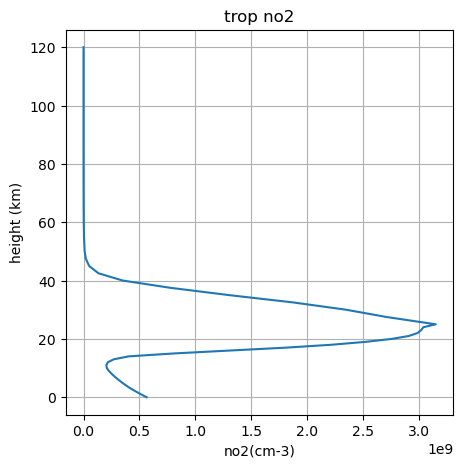

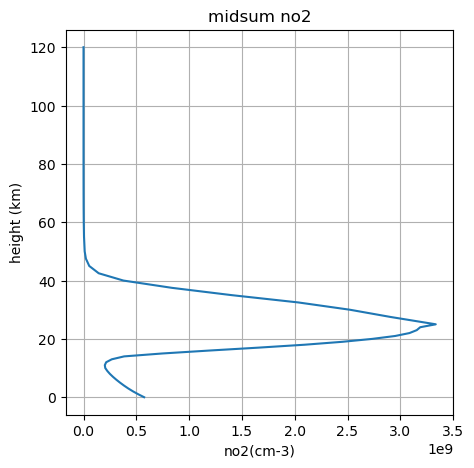

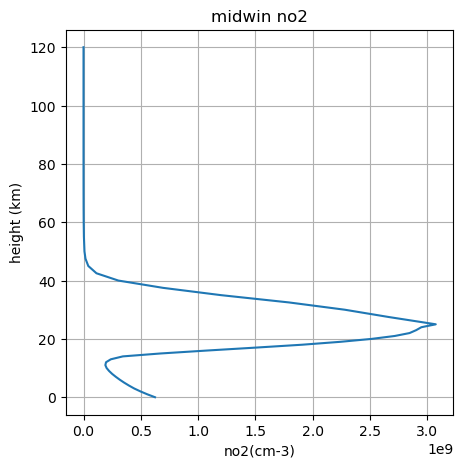

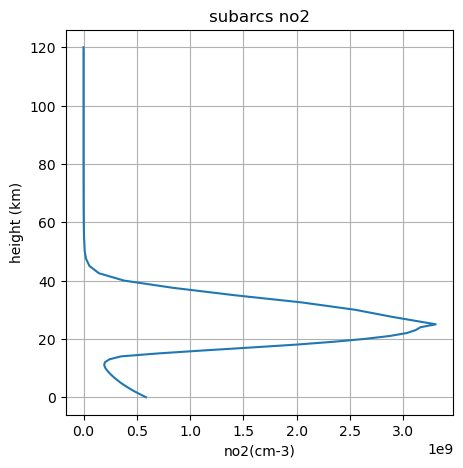

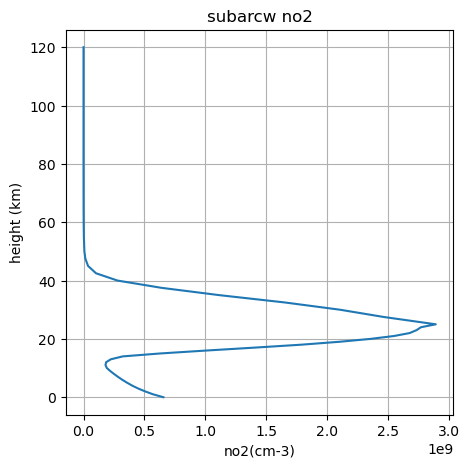

In [30]:
# no2 -> Winter levels are typically higher than those in summer

gases(trop, trop['no2(cm-3)'],'no2(cm-3)', "trop no2")
gases(midsum, midsum['no2(cm-3)'], 'no2(cm-3)', 'midsum no2')
gases(midwin, midwin['no2(cm-3)'], 'no2(cm-3)', 'midwin no2')
gases(subarcs, subarcs['no2(cm-3)'], 'no2(cm-3)', 'subarcs no2')
gases(subarcw, subarcw['no2(cm-3)'], 'no2(cm-3)', 'subarcw no2')

In [31]:
# fractions 
trop['air/h2o'] = trop['air(cm-3)']/trop['h2o(cm-3)']
midsum['air/h2o'] = midsum['air(cm-3)']/midsum['h2o(cm-3)']
midwin['air/h2o'] = midwin['air(cm-3)']/midwin['h2o(cm-3)']
subarcs['air/h2o'] = subarcs['air(cm-3)']/subarcs['h2o(cm-3)']
subarcw['air/h2o'] = subarcw['air(cm-3)']/subarcw['h2o(cm-3)']

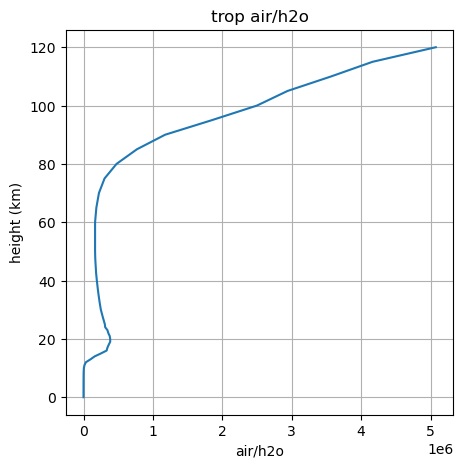

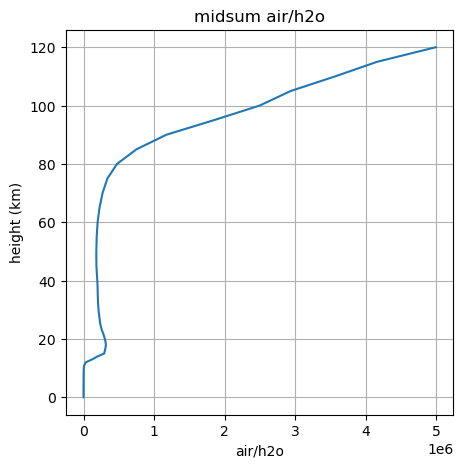

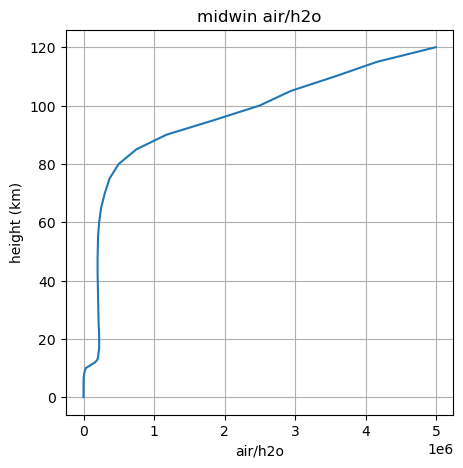

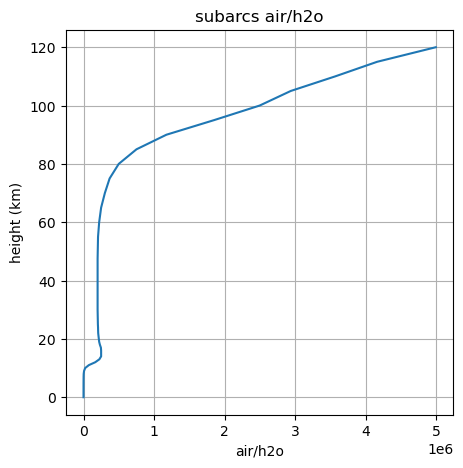

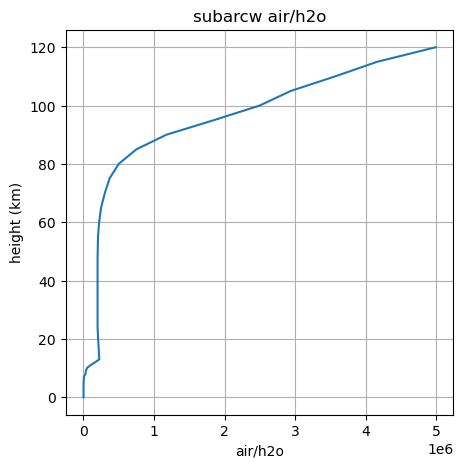

In [32]:
# water fractions
distribution(trop,trop['air/h2o'],'air/h2o','trop air/h2o')
distribution(midsum,midsum['air/h2o'],'air/h2o','midsum air/h2o')
distribution(midwin,midwin['air/h2o'],'air/h2o','midwin air/h2o')
distribution(subarcs,subarcs['air/h2o'],'air/h2o','subarcs air/h2o')
distribution(subarcw,subarcw['air/h2o'],'air/h2o','subarcw air/h2o')

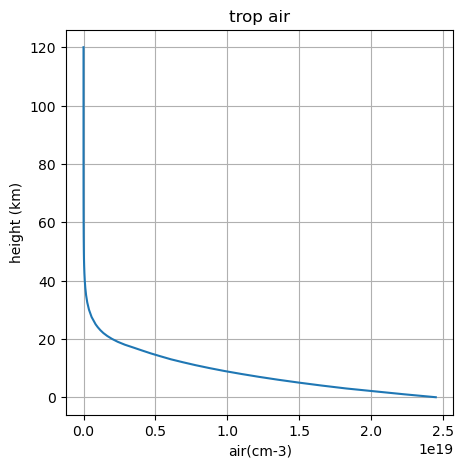

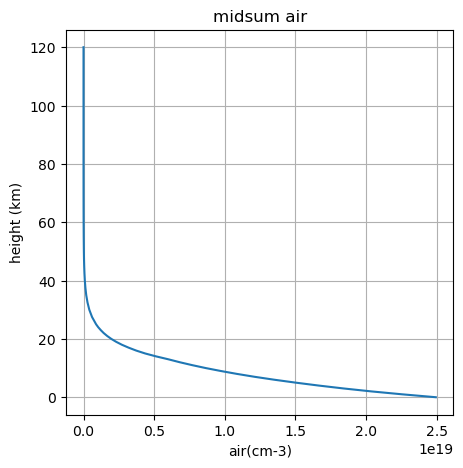

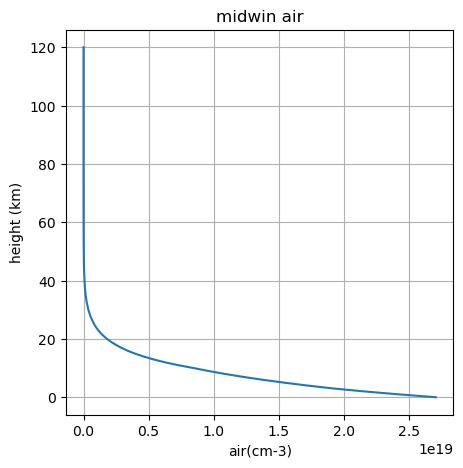

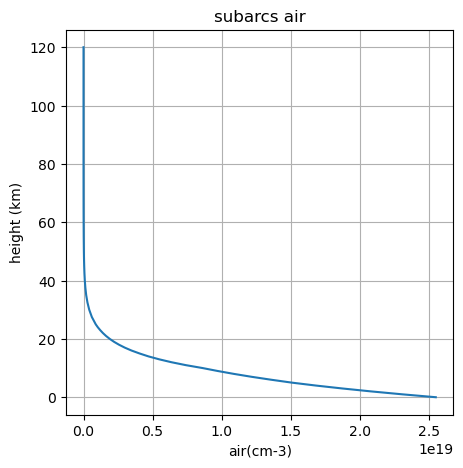

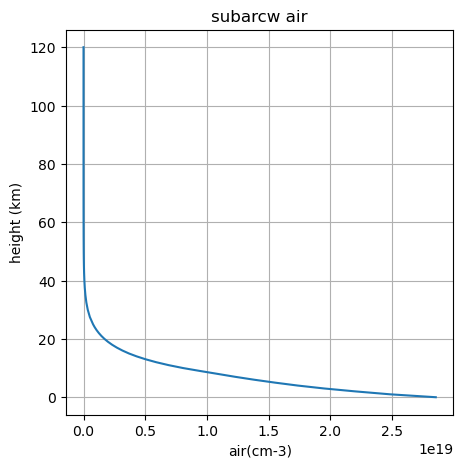

In [33]:
# air density -> that a weak dependency of density on latitude and season exists such that in summer at 200 km height
#the polar region density is 15% higher than at lower latitudes, while in winter the density decreases by 10% towards the pole

gases(trop, trop['air(cm-3)'],'air(cm-3)', "trop air")
gases(midsum, midsum['air(cm-3)'], 'air(cm-3)', 'midsum air')
gases(midwin, midwin['air(cm-3)'], 'air(cm-3)', 'midwin air')
gases(subarcs, subarcs['air(cm-3)'], 'air(cm-3)', 'subarcs air')
gases(subarcw, subarcw['air(cm-3)'], 'air(cm-3)', 'subarcw air')